<a href="https://colab.research.google.com/github/Jaydenmmc290/PHY243/blob/main/Lab_5_Motion_with_CBR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:

import io  #io has the tools we need to "i"nput and "o"utput files.
import pandas as pd #pandas has tools to deal with tables of data (normally tables are called "DataFrames" in Python).
import numpy as np #np has mathematical tools we will need every week.
from google.colab import files #files allow us to upload our csv files into google Colab.
import matplotlib.pyplot as plt #our plotting tools

from scipy.optimize import curve_fit #our curve fitting tool


Task 1: Cart is stationary

In [ ]:
uploaded = files.upload() #This command gets our data file into google colab's memory
dataframe = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))# This now moves the data we uploaded into a "dataframe" which we can then manipulate.

print(dataframe[0:2])

In [ ]:
#These abbreviations will help your code be easier to read.
time='Data Set 3:Time(s)' #This should match the first column header in the previous cell's output.  This is the version you get if you connect the CBR directly to your computer.
pos='Data Set 3:Position(m)'
vel='Data Set 3:Velocity(m/s)'
acc='Data Set 3:Acceleration(m/s²)'



df=dataframe[[time,pos,vel,acc]].dropna()  #this limits our data to just one run and removes any annoying NaN values that might be hiding at the end of our data.
#So "dataframe" has all the data from the csv file, "df" only holds the data from the single run we are looking at now.

In [ ]:
ruler_measurement=(0.99) #You will need to put your own ruler measurement here for the graph below to make sense

plt.plot(df[time],df[pos], '.', label="CBR position") #this plots position vs time (identical to what the labquest already plotted)
plt.plot([np.min(df[time]),np.max(df[time])],[ruler_measurement, ruler_measurement], '--k', label="Ruler position")  #this plots a horizontal line dashed line at ruler_measurement
plt.legend()
plt.ylabel("distance (m)")
plt.xlabel("time (s)")
plt.title("Comparing the CBR and Ruler's measurement of the cart's position")
plt.show()

print("average CBR position:", np.average(df[pos]))
print("uncertainty in CBR position:", np.std(df[pos]))



In [ ]:
#Here is some space for you to build your graphs that look at the Velocity ...
ruler_measurement=(0.99) #You will need to put your own ruler measurement here for the graph below to make sense

plt.plot(df[time],df[vel], '.', label="CBR position") #this plots position vs time (identical to what the labquest already plotted)
plt.plot([np.min(df[time]),np.max(df[time])],[ruler_measurement, ruler_measurement], '--k', label="Ruler position")  #this plots a horizontal line dashed line at ruler_measurement

plt.ylabel("Velocity (m/s)")
plt.xlabel("time (s)")
plt.title("Time vs Velocity Graph")
plt.show()

print("average CBR position:", np.average(df[pos]))
print("uncertainty in CBR position:", np.std(df[pos]))



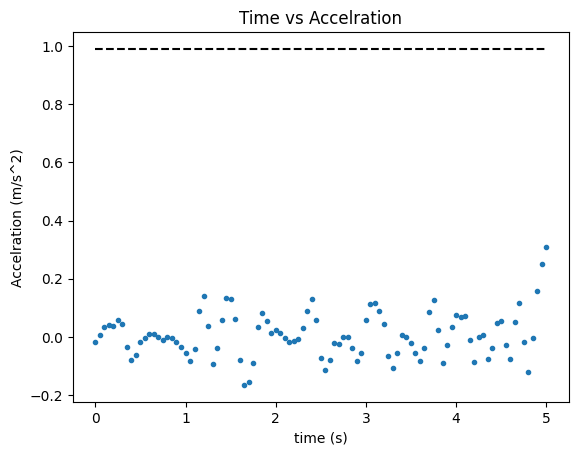

average CBR position: 1.0048099504950494
uncertainty in CBR position: 0.0011001841553881437


In [ ]:
#...and Acceleration
ruler_measurement=(0.99) #You will need to put your own ruler measurement here for the graph below to make sense

plt.plot(df[time],df[acc], '.', label="CBR position") #this plots position vs time (identical to what the labquest already plotted)
plt.plot([np.min(df[time]),np.max(df[time])],[ruler_measurement, ruler_measurement], '--k', label="Ruler position")  #this plots a horizontal line dashed line at ruler_measurement

plt.ylabel("Accelration (m/s^2)")
plt.xlabel("time (s)")
plt.title("Time vs Accelration")
plt.show()

print("average CBR position:", np.average(df[pos]))
print("uncertainty in CBR position:", np.std(df[pos]))




Task 2: Cart rolling up and down ramp

In [ ]:
uploaded2 = files.upload() #This command gets our data file into google colab's memory
dataframe2 = pd.read_csv(io.BytesIO(uploaded2[next(iter(uploaded2))]))# This now moves the data we uploaded into a "dataframe" which we can now start to manipulate.

print(dataframe2[0:3])

Saving csv-export2.csv to csv-export2 (1).csv
   Data Set 1:Time(s)  Data Set 1:Position(m)  Data Set 1:Velocity(m/s)  \
0                0.00                1.747062                  -0.89018   
1                0.05                1.702361                  -0.88417   
2                0.10                1.658181                  -0.87482   

   Data Set 1:Acceleration(m/s²)  Data Set 2:Time(s)  Data Set 2:Position(m)  \
0                       0.139677                0.00                1.606790   
1                       0.161301                0.05                1.587868   
2                       0.181766                0.10                1.569588   

   Data Set 2:Velocity(m/s)  Data Set 2:Acceleration(m/s²)  \
0                 -0.374853                       0.107955   
1                 -0.369907                       0.123710   
2                 -0.363865                       0.149185   

   Data Set 3:Time(s)  Data Set 3:Position(m)  Data Set 3:Velocity(m/s)  \
0       

In [ ]:
#Do you need to rerun this block of code or are the names still ok?
#time='Data Set 1:Time(s)' #This should match the first column header in the previous cell's output.  This is the version you get if you do not run the data directly to your computer.
#pos='Data Set 1:Position(m)'
#vel='Data Set 1:Velocity(m/s)'
#acc='Data Set 1:Acceleration(m/s²)'

df2=dataframe2[[time,pos,vel,acc]].dropna()  #this limits our data to just one run and removes any annoying NaN values that might be hiding at the end of our data.



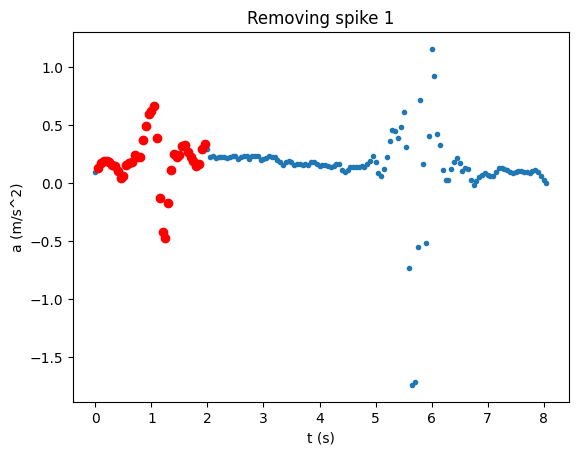

In [ ]:
# if you have spikes in your data that you want to remove, this block of code helps you identify which cells of data are bad.
spike1start=1  #this value is probably incorrect.  The goal is to change this number until the bad portion of the data is highlighted in red in the plot.
spike1end=40 #this value is probably also incorrect.


spike1time=df2[time][spike1start:spike1end]
spike1accel=df2[acc][spike1start:spike1end]


plt.plot(df2[time],df2[acc],'.')  #this plots all of your data
plt.plot(spike1time,spike1accel,'ro')  #this is trying to highlight the bad portion in red.  Adjust spike1start and spike1end to highlight the correct region.

plt.ylabel("a (m/s^2)")
plt.xlabel("t (s)")
plt.title("Removing spike 1")
plt.show()

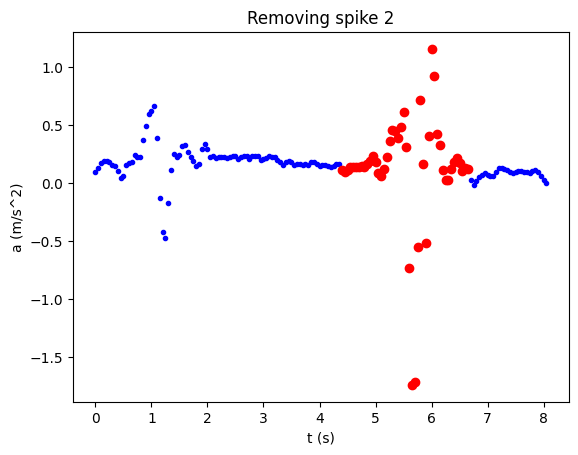

In [ ]:
# This is a copy of the previous code but it is focused on spike 2.
spike2start=88  #this value is probably incorrect.  The goal is to change this number until the bad portion of the data is highlighted in red in the plot.
spike2end=134  #this value is probably also incorrect.

spike2time=df2[time][spike2start:spike2end]
spike2accel=df2[acc][spike2start:spike2end]

plt.plot(df2[time],df2[acc],'b.')
plt.plot(spike2time,spike2accel,'ro')  #this is trying to highlight the bad portion in red.  Adjust spike2start and spike2end to highlight the region of bad data.

plt.ylabel("a (m/s^2)")
plt.xlabel("t (s)")
plt.title("Removing spike 2")

plt.show()

In [ ]:
df3=df2.drop(index=list(range(spike1start,spike1end))+list(range(spike2start,spike2end))) #this makes a new dataframe that has everything except the data in the spikes.

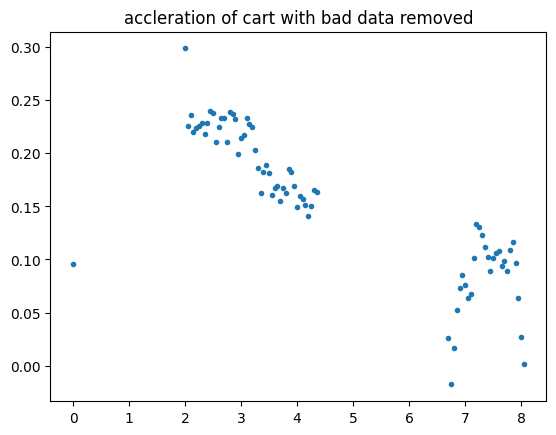

In [ ]:
plt.plot(df3[time],df3[acc],'.')
plt.title("accleration of cart with bad data removed")
plt.show()

In [ ]:
#this block of code is a framework for the Researcher 2 question

Xvalues=     #You must explicity tell the computer what you want displayed on the X-axis.  Don't forget that you can limit your data by using [start:end]
Yvalues=     #Same for the Y-axis.


def model_Linear(x,m,b):  #We are using y=m x+b as our model
  return m*(x)+b

[m_opt, b_opt], pcov = curve_fit(model_Linear, Xvalues, Yvalues)#you need to figure out what you want as your Xvalues and Yvalues to complete this fit.


y_model = model_Linear(Xvalues, m_opt, b_opt)  #this uses the optimum slope and intercept that were just calculated to calculate y_model values our Linear Model

plt.plot(Xvalues,Yvalues, '.',   label="data")
plt.plot(Xvalues,y_model, '--k', label='slope='+str(m_opt)[0:5]+'; intercept='+str(b_opt)[0:5])

plt.legend()
plt.show()



